# Project: Wrangling and Analyze Data

# TABLE OF CONTENT 
### 1. <a href="#Data gathering">Data Gathering</a>

    
### 2.  DATA ASSESSING
   1. [ASSESSING](#assessing)
   2. [REPORT](#assessing_report)
    
### 3.  DATA CLEANING
#####        QUALITY ISSUES
   1. [ISSUE1](#issue1)
   2. [ISSUE2](#issue2)
   3. [ISSSUE3](#issue3)
   4. [ISSUE4](#issue4)
   5. [ISSUE5](#issue5)
   6. [ISSUE6](#issue6)
   7. [ISSUE7](#issue7)
   8. [ISSUE8](#issue8)
#####         TIDINESS ISSUES
   1. [TIDINESS ISSUE1](#tidiness_issue1)
   2. [TIDINESS ISSUE2](#tidiness_issue2)
   
### 4.   STORING DATA
   [storing data](#storing_data)

### 5.   ANALYSIS
   [analysis](#analysis)
         
### 6.    INSIGHTS
   [insights](#insights)

#### 7.    VISUALIZATIONS
   [visualizations](#visualization)
             

## <p id="Data gathering"> Data Gathering</p>

In [58]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
# LOADING THE TWITTER ARCHIVE DATASET INTO A PANDAS DATAFRAME
df_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# DOWNLOADING THE IMAGE PREDICTIONN DATASET FROM ITS URL USING THE REQUEST LIBRARY
import os
import requests 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv',mode='wb') as file:
          file.write(response.content)

In [4]:
# LOADING THE IMAGE PREDICTION DATASET  INTO A SECOND DATAFRAME 
df_images= pd.read_csv('image_predictions.tsv',sep='\t')

In [5]:
# READING THE ADDITIONAL TWEET JSON FILE FROM A LINK PROVIDED IN THE CLASSSROOM (MY TWITTER DEVELOPER ACCOUNT HASNT BEEN APPROVED )
import requests
url1= 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url1)
with open ('tweet_json.txt',mode='wb') as file:
    file.write(response.content)
    

In [6]:
# EXTRACTING TWEET ID, FAVORITES COUUNT AND RETWEET COUNT FROM THE TWEET API FILE INTO A DICTIONARY
import json
list=[]
with open('tweet_json.txt','r') as file1:
    for line in file1:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count= tweets['retweet_count']    
        favorite_count= tweets['favorite_count']
        list.append({'tweet_id':tweet_id,'retweet_count':retweet_count, 'likes_count': favorite_count})

In [7]:
#LOADING A THIRD DATAFRAME FROM THE EXTRACTED DATA
df_likes = pd.DataFrame(list)

## Assessing Data
<a id="assessing"></a>



In [8]:
df_archive.head(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None


In [9]:
df_archive.timestamp.min(), df_archive.timestamp.max()

('2015-11-15 22:32:08 +0000', '2017-08-01 16:23:56 +0000')

In [10]:
df_likes.head()

,likes_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [11]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Bo              9
Winston         9
the             8
Sadie           8
an              7
Buddy           7
Bailey          7
Toby            7
Daisy           7
Bella           6
Leo             6
Milo            6
Scout           6
Jax             6
Dave            6
Koda            6
Stanley         6
Rusty           6
Jack            6
Oscar           6
Oakley          5
             ... 
Chubbs          1
Jiminus         1
Ashleigh        1
Staniel         1
Harry           1
Linus           1
Trevith         1
Spark           1
Comet           1
Jerome          1
Berb            1
this            1
Shikha          1
Hermione        1
Kallie          1
Arnold          1
Carper          1
Lulu            1
Miley           1
Grizzie         1
Oreo            1
Superpup        1
Brandonald      1
Alejandro       1
Tedrick   

In [15]:
df_archive.shape[0]-df_images.shape[0]

281

In [16]:
len(df_archive)

2356

## ASSESSING  REPORT
<a id="assessing_report"></a>
### Quality issues
1. rating denominator column in the twitter archive has value other than 10, which is the standard dog rating according to the we rate dogs rating system

2. some tweets in the twitter archive dataframe are duplicates of other tweet as indicated in the retweet status id column 

3. missing values in the name column in the archive dataset are represented with 'none' 

4. timestamp column in the archive dataset is in string data type 

5. inaccurate values in the name column in the archive dataset eg 'a'

6. 'retweeted_status_timestamp' column in the archive dataset is in strings datatype

7. 'None' values in doggo pupper floofer and puppo columns are inaccurate representations

8.  some column names in the image prediction table are not descriptive enough

### Tidiness issues
1.  dog stage is represented in multiple columns in the archive dataset 

2. relevant columns from all tables should be merged to form a single table

## Cleaning Data

In [17]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()
df_likes_clean = df_likes.copy()


### Issue #1:
<a id="issue1"></a>

#### Define: change all values in the rating_denominator column to 10

#### Code

In [18]:
df_archive_clean['rating_denominator'] = 10

#### Test

In [19]:
(df_archive_clean['rating_denominator'] == 10).all()

True

### Issue #2:
<a id="issue2"></a>

#### Define:
drop all rows in the archive dataset which are retweets i.e retweet_id is not null

#### Code 

In [20]:
df_archive_clean.drop(df_archive_clean[df_archive_clean.retweeted_status_id.notnull()].index,inplace = True)

#### Test

In [21]:
df_archive_clean.retweeted_status_id.isnull().all()

True

#### ISSUE#3
<a id="issue3"></a>
#### DEFINE:  
change every occurence of "None" in the name column of the archive dataset to np.nan

#### CODE

In [22]:
import numpy as np
df_archive_clean.loc[df_archive_clean.name=='None','name']=np.nan

#### TEST

In [23]:
(df_archive_clean.name=='None').any()

False

#### ISSUE#4
<a id="issue4"></a>
#### DEFINE :  convert timstamp column in the archive datset into date type

#### CODE

In [24]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

#### TEST

In [25]:
df_archive_clean.timestamp.dtypes

dtype('<M8[ns]')

#### ISSUE#5
<a id="issue5"></a>
#### DEFINE: 
change 'retweeted_status_timestamp' in the archive table into date data type 

#### CODE 

In [26]:
df_archive_clean['retweeted_status_timestamp']= pd.to_datetime(df_archive_clean['retweeted_status_timestamp'])

#### TEST 

In [27]:
df_archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### ISSUE #6
<a id="issue6"></a>
#### DEFINE 
change all wrong dog names in the name column of the archive dataset which were all inputed in lower case into np.nan

#### CODE 

In [28]:

mask = df_archive_clean['name'].str.islower()&df_archive_clean.name.notna()
column ='name'
df_archive_clean.loc[mask,column]=np.nan

#### TEST 

In [29]:
df_archive_clean['name'].isin(['a','an','the']).any()

False

#### ISSUE#7
<a id="issue7"></a>
#### DEFINE 
change every occurence of 'None' in pupper poppo floofer and doggo columns into an empty string

#### CODE

In [30]:

df_archive_clean.doggo = df_archive_clean.doggo.replace('None',' ')
df_archive_clean.puppo = df_archive_clean.puppo.replace('None',' ')
df_archive_clean.pupper = df_archive_clean.pupper.replace('None',' ')
df_archive_clean.floofer = df_archive_clean.floofer.replace('None',' ')

#### TEST

In [31]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


#### ISSUE#8
<a id="issue8"></a>
#### DEFINE 
rename column headers for the image prediction table to make them more descriptive 

In [32]:
df_images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### CODE:

In [33]:
new_columns = ['tweet_id','jpg_url','image_number','prediction1','prediction1_confidence','p1_dog','p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' ]
df_images_clean.columns=new_columns

#### TEST:

In [34]:
(df_images_clean.columns== new_columns).all()

True

#     TIDINESS ISSUES
#### ISSUE#1
<a id="tidiness_issue1"></a>
#### DEFINE
create a single column for dog stage in the archive table and drop redundant columns 

#### CODE:

In [35]:
df_archive_clean['dog_stage'] = (df_archive_clean.doggo+df_archive_clean.floofer+df_archive_clean.puppo+df_archive_clean.pupper)#.str.strip() 
df_archive_clean.drop(['doggo','pupper','floofer','puppo'], axis=1, inplace=True)
# REPLACING  ROWS CONTAINING '    's WITH np.nan
df_archive_clean['dog_stage'][df_archive_clean.dog_stage == '    '] = np.nan
# CLEANING OUT WHITE SPACES IN THE COLUMN
df_archive_clean['dog_stage'] = df_archive_clean.dog_stage.str.strip()    
# changing every occurrence of doggofloofer to doggo,floofer
df_archive_clean.loc[df_archive_clean.dog_stage=='doggofloofer','dog_stage']='doggo, floofer'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### TEST

In [36]:
df_archive_clean['dog_stage'].value_counts()    

pupper            224
doggo              75
puppo              24
doggo  pupper      10
floofer             9
doggo puppo         1
doggo, floofer      1
Name: dog_stage, dtype: int64

#### ISSUE#2
<a id="tidiness_issue2"></a>
#### DEFINE:
select relevant columns from each dataset and join them into a single table 

#### CODE:

In [37]:
df_images_clean.columns

Index(['tweet_id', 'jpg_url', 'image_number', 'prediction1',
       'prediction1_confidence', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [38]:
# SELECTING NEEDED COLUMNS FROM THE ARCHIVE AND IMAGE PREDICTION DATASET 
df_archive_clean = df_archive_clean[['tweet_id','timestamp','rating_numerator','rating_denominator','name','dog_stage']]  
df_images_clean = df_images_clean[df_images_clean.columns[0:6]]
#    MERGING ALL TABLES
cleaned_table= pd.merge(df_archive_clean,df_images_clean,on='tweet_id',how ='inner')
cleaned_table = pd.merge(cleaned_table,df_likes_clean,how='inner',on='tweet_id')    

#### TEST 

In [39]:
cleaned_table.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,image_number,prediction1,prediction1_confidence,p1_dog,likes_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,41048,9774


In [40]:
cleaned_table.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [41]:
cleaned_table.describe()

,tweet_id,rating_numerator,rating_denominator,image_number,prediction1_confidence,likes_count,retweet_count
count,1.994000e+03,1994.000000,1994.0,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.280843,10.0,1.203109,0.593941,8895.725677,2766.753260
std,6.747816e+16,41.497718,0.0,0.560777,0.271954,12213.193181,4674.698447
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,81.000000,16.000000
25%,6.758475e+17,10.000000,10.0,1.000000,0.362857,1982.000000,624.750000
50%,7.084748e+17,11.000000,10.0,1.000000,0.587635,4136.000000,1359.500000
75%,7.877873e+17,12.000000,10.0,1.000000,0.846285,11308.000000,3220.000000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,132810.000000,79515.000000


## Storing Data
<a id="storing_data"></a>
The final table will be stored to a CSV file named "twitter_archive_master.csv".

In [42]:
cleaned_table.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
<a id="analysis"></a>

In [43]:
most_popular_breeds= cleaned_table.prediction1.value_counts()[0:5]
most_popular_breeds

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
Name: prediction1, dtype: int64

In [44]:
#WHICH DOG BREED HAS THE HIGHEST LIKE COUNT AND RETWEET_COUNT    
most_liked_breeds= (cleaned_table.groupby(by='prediction1').sum()[['likes_count','retweet_count']].sort_values(by='likes_count',ascending=False))[0:5]
most_liked_breeds
most_shared_breeds= (cleaned_table.groupby(by='prediction1').sum()[['likes_count','retweet_count']].sort_values(by='retweet_count',ascending=False))[0:5]
most_shared_breeds

,likes_count,retweet_count
prediction1,,
golden_retriever,1696627.0,502096.0
Labrador_retriever,1123850.0,366682.0
Pembroke,994755.0,280367.0
Chihuahua,676441.0,220695.0
Samoyed,542991.0,184922.0


In [45]:
#WHICH DOG BREED HAS THE HIGEST TOTAL RATING VALUE   
highest_rated_breeds=(cleaned_table.groupby('prediction1').sum()[['rating_numerator', 'rating_denominator']])
highest_rated_breeds= highest_rated_breeds.sort_values('rating_numerator',ascending=False)[0:6]
# the dog breed prediction contains 1 invalid value 'bow_tie' which will  dropped
highest_rated_breeds.drop('bow_tie', axis = 0,inplace=True)
highest_rated_breeds


,rating_numerator,rating_denominator
prediction1,,
golden_retriever,1836.0,1390.0
Labrador_retriever,1321.0,950.0
Pembroke,1007.0,880.0
Chihuahua,846.0,790.0
pug,553.0,540.0


In [46]:
# WHAT HOUR OF THE DAY WERE THE MOST LIKED TWEETS TWEETED
#CRAETING A HOURS COLUMN
cleaned_table['hour']= cleaned_table.timestamp.dt.hour
most_liked_tweets = cleaned_table.sort_values('likes_count',ascending=False)[0:100]
most_liked_tweets.groupby('hour').count()['likes_count'].sort_values(ascending=False)

hour
0     28
16    18
1     11
15     7
18     5
17     5
23     4
21     4
19     4
2      4
20     3
3      3
22     2
6      1
4      1
Name: likes_count, dtype: int64

In [47]:
# WHAT HOUR OF THE DAY WERE THE MOST RETWEETED TWEETS TWEETED
most_retweeted_tweets = cleaned_table.sort_values('retweet_count',ascending=False)[0:100]
most_retweeted_tweets.groupby('hour').count()['retweet_count'].sort_values(ascending=False)

hour
0     22
16    15
1     11
18     9
2      8
17     7
15     5
21     4
19     4
3      4
23     3
20     3
22     2
4      2
6      1
Name: retweet_count, dtype: int64

In [48]:
# WHAT HOUR OF THE DAY WERE THE HIGHEST RATED TWEETS TWEETED
highest_rated_tweets = cleaned_table.sort_values('rating_numerator',ascending=False)[0:100]
highest_rated_tweets.groupby('hour').count()['rating_numerator'].sort_values(ascending=False)

hour
1     14
17    13
16    12
23    10
0     10
15     9
2      8
21     6
18     5
3      4
5      3
22     2
19     2
4      2
Name: rating_numerator, dtype: int64

In [49]:
#WHICH DOG BREEDS ARE COMMON WITH THE HIGHEST RATED TWEETS
highest_rated_tweets.prediction1.value_counts()[0:5]

golden_retriever      11
Pembroke               7
Samoyed                6
Labrador_retriever     5
Chihuahua              4
Name: prediction1, dtype: int64

In [50]:
# WHICH DOG BREEDS ARE COMMON WITH THE MOST LIKED TWEETS 
most_liked_tweets.prediction1.value_counts()[0:5]

golden_retriever      12
Samoyed                7
Labrador_retriever     6
Pembroke               5
Chihuahua              5
Name: prediction1, dtype: int64

In [51]:
#WHICH DOG STAGE ARE COMMON WITH THE MOST LIKED TWEETS
most_liked_tweets.dog_stage.value_counts()

doggo            10
pupper            7
puppo             4
floofer           1
doggo puppo       1
doggo  pupper     1
Name: dog_stage, dtype: int64

In [52]:
# WHICH DOGS HAD THE BEST PERFORMING TWEETS 
#BEST PERFORMING TWEET WILL BE DETERMINED BY THE TWEET WITH THE HIGHEST RANK ACROSS THE MOST LIKED, MOST RETWEETED AND MOST RATED TABLES

# CREATING A RANK COLUMN ON THESE TABLES
most_liked_tweets['likes_rank']= most_liked_tweets.reset_index().index+1
most_retweeted_tweets['retweet_rank']= most_retweeted_tweets.reset_index().index+1
highest_rated_tweets['rating_rank']=highest_rated_tweets.reset_index().index+1
#merging all ranked tables
ranked_table=most_liked_tweets.merge(most_retweeted_tweets, how='outer', on='tweet_id').merge(highest_rated_tweets,how='outer',on='tweet_id')
#ADDING A TWEET PERFORMANCE COLUMN 
ranked_table['tweet_performance']=ranked_table.likes_rank+ranked_table.retweet_rank+ranked_table.rating_rank
ranked_table.sort_values('tweet_performance',inplace=True)
# KEEPING ONLY TWEETS PRESENT ON ALL THREE TABLES
ranked_table.dropna(inplace = True)
ranked_table.drop([ 'timestamp_x', 'rating_numerator_x', 'rating_denominator_x',
       'name_x', 'dog_stage_x', 'jpg_url_x', 'image_number_x', 'prediction1_x',
       'prediction1_confidence_x', 'p1_dog_x', 'likes_count_x',
       'retweet_count_x', 'hour_x',  'timestamp_y',
       'rating_numerator_y', 'rating_denominator_y', 'name_y', 'dog_stage_y',
       'jpg_url_y', 'image_number_y', 'prediction1_y',
       'prediction1_confidence_y', 'p1_dog_y', 'likes_count_y',
       'retweet_count_y', 'hour_y' ],axis=1,inplace = True)

ranked_table


,tweet_id,likes_rank,retweet_rank,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,image_number,prediction1,prediction1_confidence,p1_dog,likes_count,retweet_count,hour,rating_rank,tweet_performance
5,819004803107983360,6.0,6.0,2017-01-11 02:15:36,14.0,10.0,Bo,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1.0,standard_poodle,0.351308,True,95450.0,42228.0,2.0,28.0,40.0
27,819006400881917954,28.0,18.0,2017-01-11 02:21:57,14.0,10.0,Sunny,doggo,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4.0,prison,0.907083,False,49960.0,21794.0,2.0,29.0,75.0
94,822462944365645825,95.0,36.0,2017-01-20 15:17:01,14.0,10.0,Gabe,pupper,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3.0,Pomeranian,0.960199,True,31800.0,17209.0,15.0,22.0,153.0


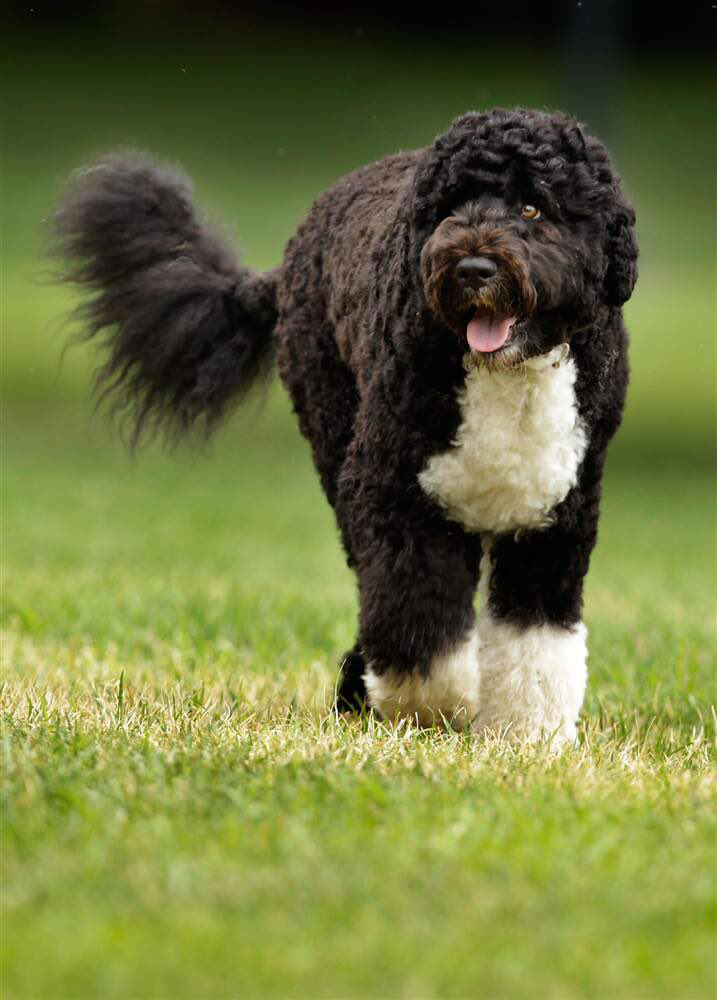

In [53]:
# GETTING PICTURE OF THE DOG WITH THE BEST PERFORMING TWEET 
# importing modules
import urllib.request
from PIL import Image

urllib.request.urlretrieve('https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg','dog.jpg'
)

img = Image.open("dog.jpg")
img


### Insights:
<a id="insights"></a>
1.  The most tweeted about, or in other words the most popular dog breeds in the we rate dog's page are golden_retriever, Labrador_retriever, Pembroke and Chihuahua. they are also the most liked, retweeted and highly rated dog breeds.

2.  The most engaging tweets were tweeted between 11pm to 1am at night and 3pm to 6pm in the evening. 77% of the 100 most liked tweets were tweeted within this hours of the day.

3.  The dog stage 'doggo' is the most common dog stage among the most liked tweets 
4.  The dog with the best performing tweet in terms of likes, retweet and rating ranking was a black and white standard poodle named BO in the doggo stage and was tweeted about in 2017 at 2am 

### Visualization
<a id="visualization"></a>

Text(0.5,0,'retweets')

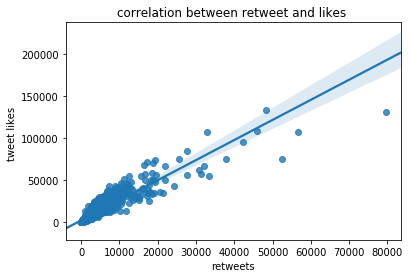

In [56]:
# IS THERE A CORRELATION BETWEEN NUMBER OF TWEET LIKES AND RETWEETS
import seaborn as sns 
y= cleaned_table.likes_count
x= cleaned_table.retweet_count
sns.regplot(x=x,y=y)
plt.title('correlation between retweet and likes ')
plt.ylabel('tweet likes ')
plt.xlabel('retweets')

There is a positive correlation between tweet likes and retweets 


(0, 20)

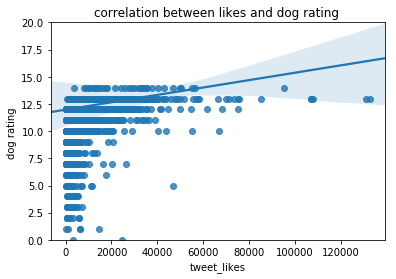

In [57]:
x1= cleaned_table.likes_count
y1= cleaned_table.rating_numerator


sns.regplot(x1,y1)
plt.title('correlation between likes and dog rating ')
plt.ylabel('dog rating ')
plt.xlabel('tweet_likes')
plt.ylim(0,20)

There is a slight positive correlation between tweet likes and dog rating 

Text(0,0.5,'number of tweets')

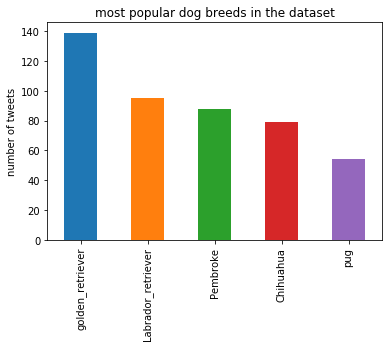

In [56]:
# THE MOST POPULAR DOG BREEDS IN THE DATASET
cleaned_table.prediction1.value_counts()[0:5].plot(kind='bar')
plt.title('most popular dog breeds in the dataset')
plt.ylabel('number of tweets')

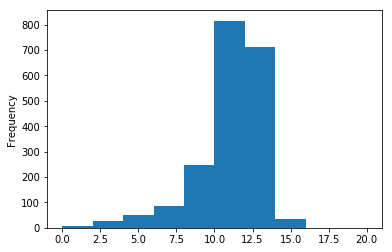

In [58]:
# HOW ARE THE DOG RATINGS DISTRIBUTED
# ONLY ABOUT 10  OF THE RATINGS ARE OVER 20 SO SHOWING THAT RANGE WILL GIVE US A MORE ACCURATE DISTRIBUTION
cleaned_table.rating_numerator.plot('hist', range=(0,20))
